과제 #3은 Mall_Customer.csv 데이터를 불러오고, 전처리와 EDA를 한 후,
수업시간에 배운 아래의 세 가지 방법 + 새로운 방법 최소 한 가지를 이용해 Clustering을 하고
하이퍼파라미터도 변화시켜보고
다양한 Clustering 방법에 대해 비교/평가하는 과제입니다.

# 1. Data

In [1]:
import numpy as np
import pandas as pd

mall_df = pd.read_csv('Mall_Customers.csv')
mall_df 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
mall_df.shape

(200, 5)

## 1-1. Description

In [3]:
# data type 확인 
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
mall_df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
# 결측치 확인
mall_df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## 1-2. Data Pre-processing & EDA

### 변수 제거

In [6]:
# CustomerID 인덱스 역할을 하는 변수이므로 제거.
mall_df.drop(['CustomerID'], axis=1, inplace=True)
mall_df
# 나이, 연간 소득, 지출 점수

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


### One-hot encoding

In [7]:
mall_df['Gender'].replace({'Male':0, 'Female':1}, inplace=True)
mall_df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


### Feature Scaling

In [8]:
# 거리기반 알고리즘을 사용하기 때문에 표준화

from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()

In [9]:
fitted = std_scaler.fit(mall_df)
mall_scaled = std_scaler.transform(mall_df)
mall_scaled = pd.DataFrame(mall_scaled, columns=mall_df.columns, index=list(mall_df.index.values))
mall_scaled

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-1.128152,-1.424569,-1.738999,-0.434801
1,-1.128152,-1.281035,-1.738999,1.195704
2,0.886405,-1.352802,-1.700830,-1.715913
3,0.886405,-1.137502,-1.700830,1.040418
4,0.886405,-0.563369,-1.662660,-0.395980
...,...,...,...,...
195,0.886405,-0.276302,2.268791,1.118061
196,0.886405,0.441365,2.497807,-0.861839
197,-1.128152,-0.491602,2.497807,0.923953
198,-1.128152,-0.491602,2.917671,-1.250054


### EDA

In [10]:
%matplotlib inline 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn')
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

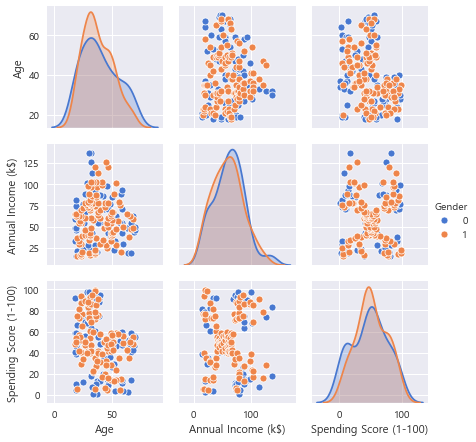

In [11]:
sns.set_palette("muted")
sns.pairplot(mall_df, height=2, diag_kind="kde", hue='Gender')
plt.show()

* 성별에 의한 뚜렷한 차이는 보이지 않는다.

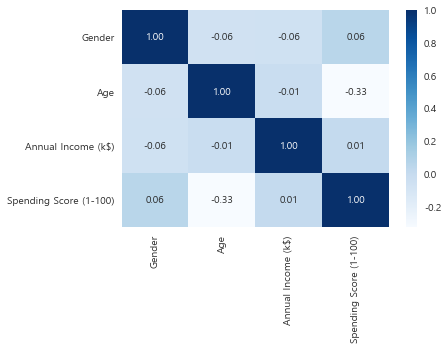

In [12]:
sns.heatmap(mall_df.corr(), annot=True, fmt = '.2f', cmap='Blues')  
plt.show()

* 변수들간 강한 상관관계는 없는 걸로 보인다.

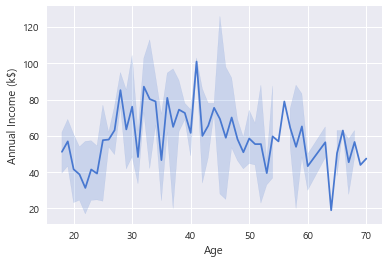

In [13]:
sns.lineplot('Age', 'Annual Income (k$)', data=mall_df)

* 나이 20부터 연간 소득이 증가하는 추세를 보이고, 40기준으로 연간 소득이 감소하는 추세를 보인다.

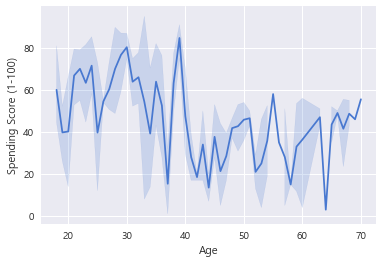

In [14]:
sns.lineplot('Age', 'Spending Score (1-100)', data=mall_df)

* 나이 40전은 지출 점수가 높은 편이지만 40이후는 상대적으로 지출 점수가 낮다.

# 2. Clustering

## 2-1. K-Means Clustering

In [15]:
from sklearn.cluster import KMeans

### 최적의 K 찾기

#### 1. Elbow Point

k-means++는 중심점을 배치하는 걸 그냥 임의로 하는 대신 좀 더 신중하게 하는 방법
1. 가지고 있는 데이터 포인트 중에서 무작위로 1개를 선택하여 첫번째 중심점으로 지정

2. 나머지 데이터 포인트들에 대해 그 첫번째 중심점까지의 거리를 계산한다

3. 두번째 중심점은 각 점들로부터 거리비례 확률에 따라 선택한다. 즉, 이미 지정된 중심점으로부터 최대한 먼 곳에 배치된 데이터포인트를 그 다음 중심점으로 지정한다는 뜻.

4. 중심점이 k개가 될 때까지 2, 3번을 반복한다.

([<matplotlib.axis.XTick at 0x20fc6dc6d48>,
 <a list of 18 Text xticklabel objects>)

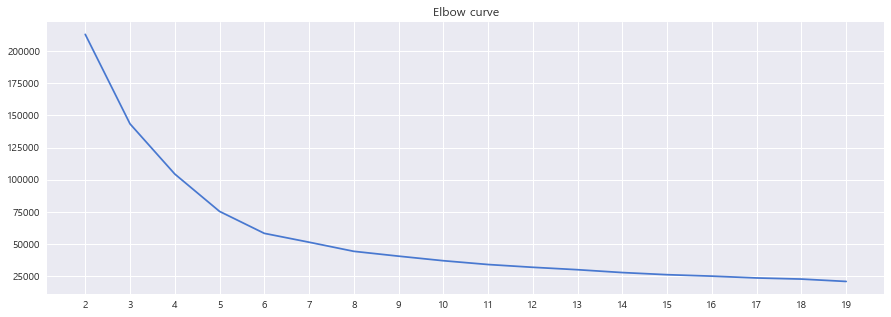

In [16]:
X = mall_df
distorsions = []

# 군집 수 K의 변화에 따라
# Inertia Value: 군집화가 된 후에, 각 중심점에서 군집내의 데이터간의 거리를 합산한 것
# 즉, 군집의 응집도를 나타내는 값
# 이 값을 구해 그래프로 그린다!
for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=11)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.title('Elbow curve')
plt.xticks(np.arange(2, 20, 1))

# 급격하게 하강하다가 변화의 폭이 크지 않는 지점 Elbow Point를 찾는다.

* Elbow curve로 보았을 때 k=5 정도에서 변화의 폭이 크지 않아 보인다.

#### 2. Silhouette Score

Elbow Point를 찾는 것보다 더 계산 비용이 많이 들지만 정확한 방법

실루엣 점수 = 실루엣 계수의 평균.

실루엣 계수는 -1에서 +1까지 바뀔 수 있다. +1에 가까우면 자신의 클러스터 안에 잘 속해 있고 다른 클러스터와는 멀리 떨어져 있다는 뜻.

([<matplotlib.axis.XTick at 0x20fc6e5f208>,
 <a list of 18 Text xticklabel objects>)

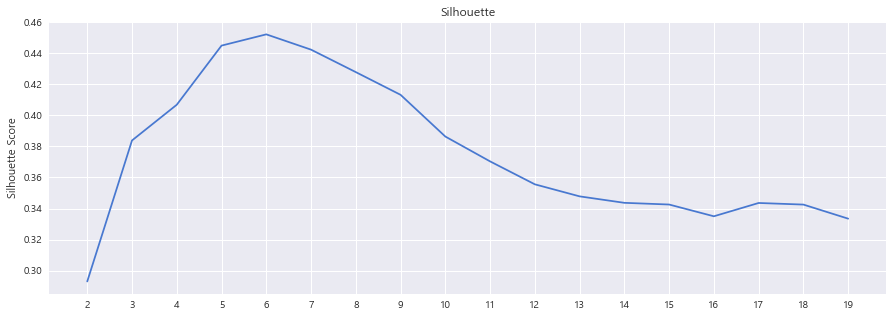

In [17]:
from sklearn.metrics import silhouette_score

X = mall_df
distorsions = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, init="k-means++", random_state=11)
    kmeans.fit(X)
    y_pred = kmeans.labels_
    distorsions.append(silhouette_score(X, y_pred))

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), distorsions)
plt.grid(True)
plt.ylabel("Silhouette Score")
plt.title('Silhouette')
plt.xticks(np.arange(2, 20, 1))

In [18]:
print(distorsions)
print(max(distorsions))  # k=6일 때

[0.29307334005502633, 0.383798873822341, 0.4067767360772861, 0.44482259384548795, 0.45206493204632353, 0.44222498029140567, 0.4277721345758326, 0.4131638556977494, 0.3863201482198832, 0.37032700975934135, 0.3555710385302946, 0.34782190231080096, 0.3436590281053522, 0.34256781367013517, 0.33499913318870456, 0.34356180790368507, 0.3425337082227257, 0.3334707801187081]
0.45206493204632353


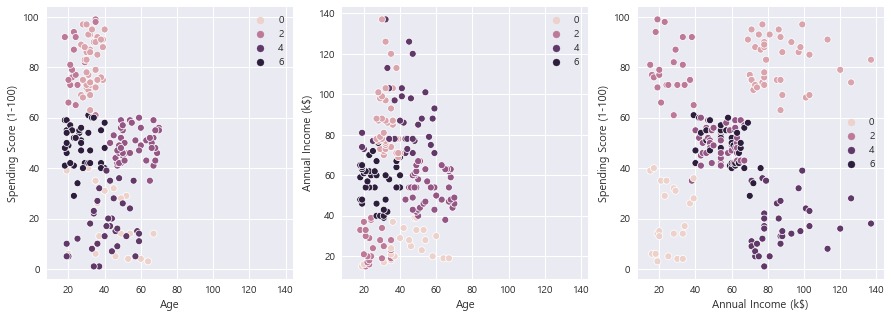

In [19]:
kmeans = KMeans(n_clusters=6, init="k-means++", random_state=11)
kmeans.fit(mall_df)

f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=mall_df, hue=kmeans.labels_, ax=axes[0])

sns.scatterplot(x='Age', y='Annual Income (k$)', data=mall_df, hue=kmeans.labels_, ax=axes[1])

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=mall_df, hue=kmeans.labels_, ax=axes[2])

* 어느정도 잘 구분한다.

## 2-2. Agglomerative Hierarchical Clustering

응집형 계층적군집 (Agglomerative Hierachical Clustering)

계층적 군집화에서 두 군집간의 거리

- 최단 연결법 (single) : 가장 가까이 있는 두 관측치 사이 거리

- 최장 연결법 (complete) : 가장 멀리 떨어진 두 관측치 사이 거리

- 평균 연결법 (average)  : 모든 가능한 거리의 평균 거리

- 중심 연결법(centroid linkage) : 두 군집 사이의 거리는 두 군집의 중심간 거리로 계산

- 와드 연결법(ward linkage) : 군집 간의 거리에 따라 데이터들을 연결하기 보다는 군집 내 편차들의 제곱합(SSE)에 근거를 두고 군집들을 병합시키는 방법(다른 방법에 비해 노이즈나 이상치에 덜 민감한 장점이 있다)

Text(0, 0.5, '클러스터 거리')

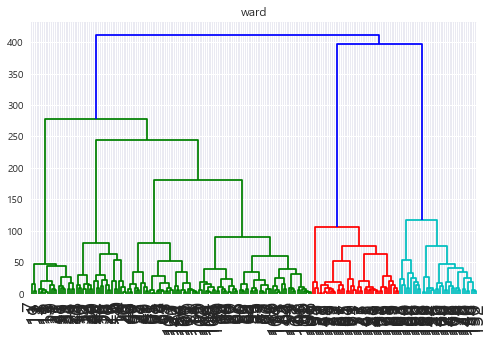

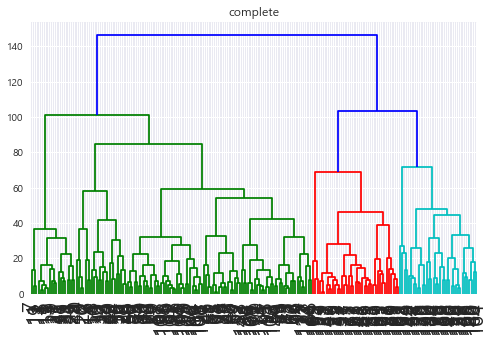

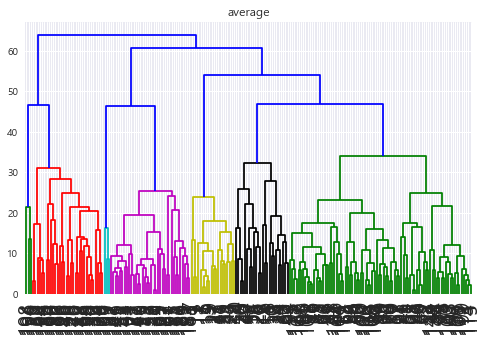

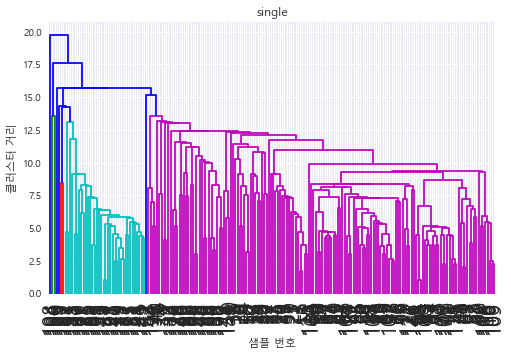

In [20]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
method = ['ward', 'complete', 'average', 'single']

for i in method:
    mergings = linkage(mall_df, method=i)

# Plot the dendrogram, using varieties as labels

    plt.figure(figsize=(8,5))
    dendrogram(mergings,
                leaf_rotation=90,
                leaf_font_size=20)
    plt.title(i)
ax = plt.gca()
bounds = ax.get_xbound()
# ax.plot(bounds, [25, 25], '--', c='y', linewidth=4,)  # 2개의 클러스터가 생기는 지점
# ax.plot(bounds, [10, 10], '--', c='y', linewidth=4,)  # 4개의 클러스터가 생기는 지점
# ax.text(bounds[1], 25, ' 2 Clusters ', va='center', fontdict={'size': 20})
# ax.text(bounds[1], 10, ' 4 Clusters ', va='center', fontdict={'size': 20})
plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")

Text(0, 0.5, '클러스터 거리')

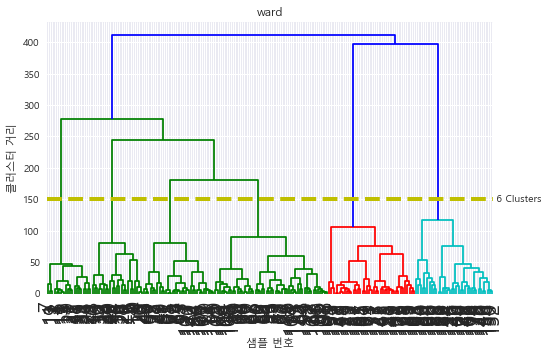

In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate the linkage: mergings
mergings = linkage(mall_df, method='ward')

# Plot the dendrogram, using varieties as labels
plt.figure(figsize=(8,5))
dendrogram(mergings,
           leaf_rotation=90,
           leaf_font_size=20)
plt.title('ward')
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [150, 150], '--', c='y', linewidth=4,)  # 6개의 클러스터가 생기는 지점
ax.text(bounds[1], 150, ' 6 Clusters ', va='center', fontdict={'size': 10})

plt.xlabel("샘플 번호")
plt.ylabel("클러스터 거리")

* 다른 방법에 비해 노이즈나 이상치에 덜 민감한 장점이 있는 ward 연결법을 사용하기로 결정했다.
* n_clusters=6으로 결정.

In [22]:
from sklearn.cluster import AgglomerativeClustering

np.random.seed(0)
agg = AgglomerativeClustering(n_clusters=6, linkage='ward') 
y_pred_agg = agg.fit_predict(mall_df)

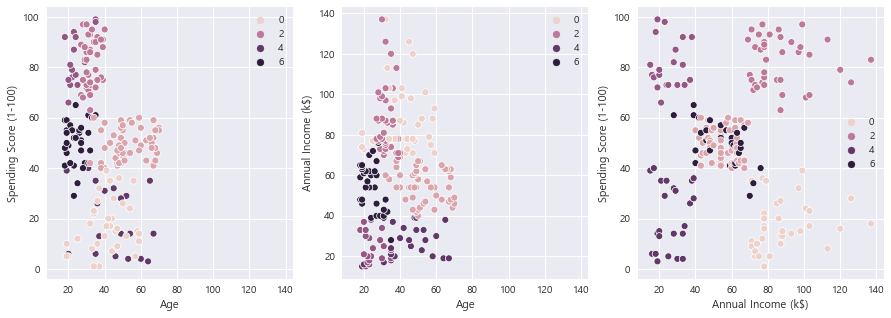

In [23]:
agg.fit(mall_df)

f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=mall_df, hue=agg.labels_, ax=axes[0])

sns.scatterplot(x='Age', y='Annual Income (k$)', data=mall_df, hue=agg.labels_, ax=axes[1])

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=mall_df, hue=agg.labels_, ax=axes[2])

* K-Means와 비슷한 군집형태를 보인다.

## 2-3. DBSCAN

In [25]:
from sklearn.cluster import DBSCAN

for min_sample in [3, 5, 7, 9]:
    for eps in [0.05, 0.2, 0.4, 0.9, 1, 3, 5, 7, 9, 11, 13, 15, 17]:
        dbscan = DBSCAN(min_samples=min_sample, eps=eps)
        labels = dbscan.fit_predict(mall_df) 
        print('︎=== min_sample:{}, eps:{} ==='.format(min_sample, eps))

        print('')

        print('cluster 수: {}'.format(len(np.unique(labels))))

        print('cluster 크기: {}\n'.format(np.bincount(labels+1)))

︎=== min_sample:3, eps:0.05 ===

cluster 수: 1
cluster 크기: [200]

︎=== min_sample:3, eps:0.2 ===

cluster 수: 1
cluster 크기: [200]

︎=== min_sample:3, eps:0.4 ===

cluster 수: 1
cluster 크기: [200]

︎=== min_sample:3, eps:0.9 ===

cluster 수: 1
cluster 크기: [200]

︎=== min_sample:3, eps:1 ===

cluster 수: 1
cluster 크기: [200]

︎=== min_sample:3, eps:3 ===

cluster 수: 4
cluster 크기: [191   3   3   3]

︎=== min_sample:3, eps:5 ===

cluster 수: 14
cluster 크기: [134   5   5   3   9   7   7   8   3   3   3   6   4   3]

︎=== min_sample:3, eps:7 ===

cluster 수: 14
cluster 크기: [91  8 18  3  5 10 19  7  3  3 24  3  3  3]

︎=== min_sample:3, eps:9 ===

cluster 수: 12
cluster 크기: [48 15  5  4 47 28  7 30  3  4  6  3]

︎=== min_sample:3, eps:11 ===

cluster 수: 10
cluster 크기: [ 25 101   7   8  33  13   3   4   3   3]

︎=== min_sample:3, eps:13 ===

cluster 수: 4
cluster 크기: [ 16 146  34   4]

︎=== min_sample:3, eps:15 ===

cluster 수: 3
cluster 크기: [  5 156  39]

︎=== min_sample:3, eps:17 ===

cluster 수: 2
cluste

︎
* min_sample:9, eps:13 일 때 고르게 나뉜 것 같아서 선택
* cluster 수: 5
cluster 크기: [56 19 82 31 12]

In [26]:
# DBSCAN 적용
np.random.seed(0)
dbscan = DBSCAN(eps=13, min_samples=9)
y_pred_db = dbscan.fit_predict(mall_df)

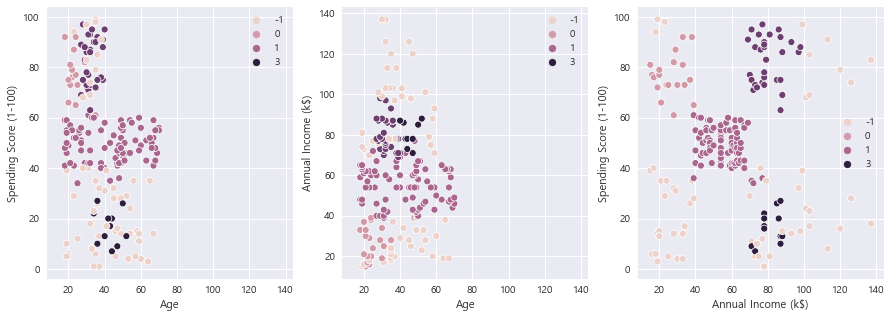

In [27]:
f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=mall_df, hue=dbscan.labels_, ax=axes[0])

sns.scatterplot(x='Age', y='Annual Income (k$)', data=mall_df, hue=dbscan.labels_, ax=axes[1])

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=mall_df, hue=dbscan.labels_, ax=axes[2])

* 앞의 모델들보다 조금 성능이 떨어져 보인다.
* 이 모델은 모든 클러스터가 충분히 밀집되어 있고 밀집되어 있지 않은 지역과 잘 구분될 때 좋은 성능을 내는데, 현재 데이터가 밀도가 확연히 구분이 되지 않는 형태라서 그런 것 같다.

## 2-4. 가우시안 혼합 모델(GMM) 

* 샘플이 파라미터를 모르는 몇 개의 가우시안 분포에서 생성되었다고 가정하는 확률 모델

* 데이터가 유한한 개수의 타원 모양 클러스터로 군집화 돼 있다는 가정.(클러스터의 타원 모양, 크기, 방향, 밀집도는 다를 수 있음)

* 밀집도 추정, 군집, 이상치 탐지에 이 모델을 사용할 수 있음.

In [28]:
from sklearn.mixture import GaussianMixture

### 최적 모수 선택

In [29]:
cv_types = ['spherical', 'tied', 'diag', 'full'] #  공분산 행렬 방법
ks = range(1, 15)
cv_bic = {}
cv_aic = {}

for c in cv_types:
    k_bic = {}
    k_aic = {}
    for k in ks:
        bic = GaussianMixture(n_components=k, covariance_type=c
                             ).fit(mall_df).bic(mall_df)
        aic = GaussianMixture(n_components=k, covariance_type=c
                             ).fit(mall_df).aic(mall_df)
        k_bic[k] = bic
        k_aic[k] = aic
    cv_bic[c] = k_bic
    cv_aic[c] = k_aic

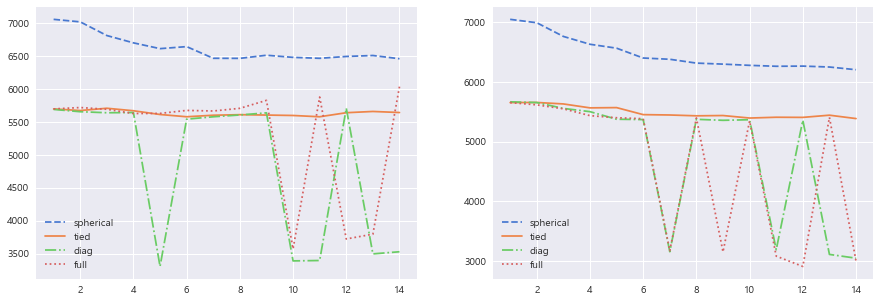

In [30]:
f, axes = plt.subplots(1, 2, figsize=(15, 5), sharex=True)

bic_candidates = pd.DataFrame(cv_bic)
bic_candidates.plot(style=['--', '-', '-.', ':'], ax=axes[0])

aic_candidates = pd.DataFrame(cv_aic)
aic_candidates.plot(style=['--', '-', '-.', ':'], ax=axes[1])

plt.show()

* 보통은 spherical을 많이 사용하며 실제 성능도 괜찮게 나오기 때문에 spherical을 선택
* bic, aic 둘 다 k=6 정도 이후로 변화의 폭이 작기 때문에 k=6으로 선택

In [31]:
gm = GaussianMixture(n_components=6, covariance_type = 'spherical', random_state = 0)
gm_pred = gm.fit_predict(mall_df)

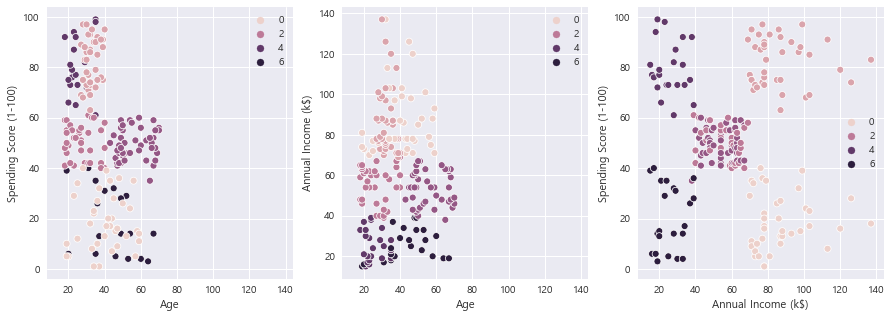

In [32]:
f, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True)

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=mall_df, hue=gm_pred, ax=axes[0])

sns.scatterplot(x='Age', y='Annual Income (k$)', data=mall_df, hue=gm_pred, ax=axes[1])

sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=mall_df, hue=gm_pred, ax=axes[2])

* 앞의 알고리즘들과 비교해 훨씬 잘 구분했다.

# 3. 모형 비교 및 평가

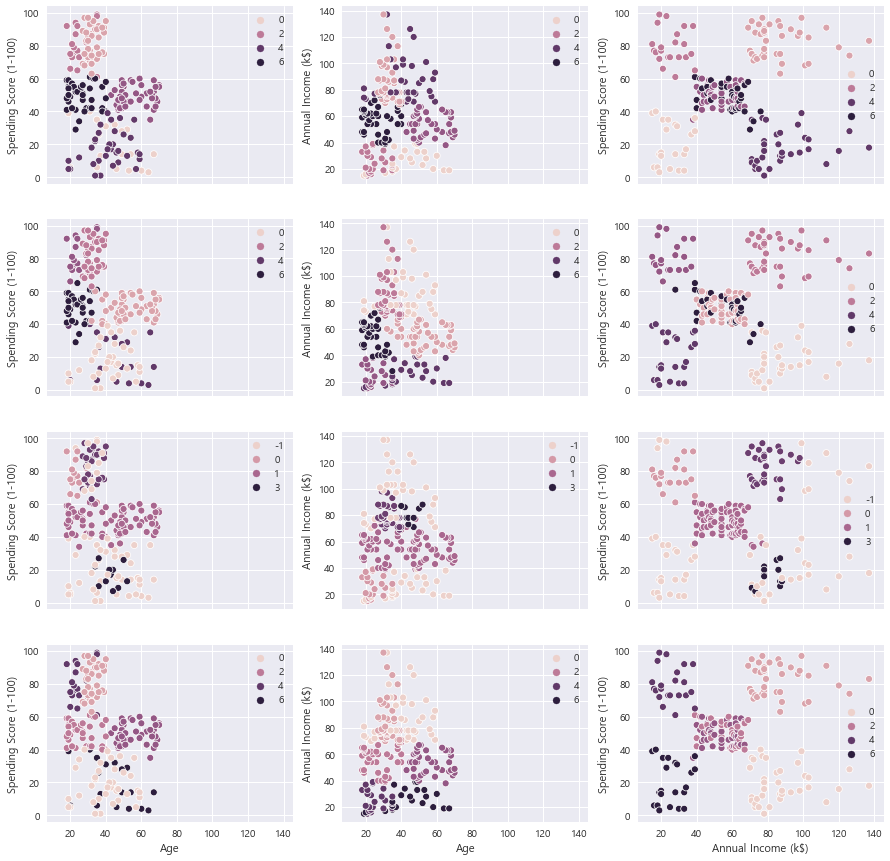

In [33]:
f, axes = plt.subplots(4, 3, figsize=(15, 15), sharex=True)

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=mall_df, hue=kmeans.labels_, ax=axes[0,0])
sns.scatterplot(x='Age', y='Annual Income (k$)', data=mall_df, hue=kmeans.labels_, ax=axes[0,1])
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=mall_df, hue=kmeans.labels_, ax=axes[0,2])

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=mall_df, hue=agg.labels_, ax=axes[1,0])
sns.scatterplot(x='Age', y='Annual Income (k$)', data=mall_df, hue=agg.labels_, ax=axes[1,1])
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=mall_df, hue=agg.labels_, ax=axes[1,2])

sns.scatterplot(x='Age', y='Spending Score (1-100)', data=mall_df, hue=dbscan.labels_, ax=axes[2,0])
sns.scatterplot(x='Age', y='Annual Income (k$)', data=mall_df, hue=dbscan.labels_, ax=axes[2,1])
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=mall_df, hue=dbscan.labels_, ax=axes[2,2])


sns.scatterplot(x='Age', y='Spending Score (1-100)', data=mall_df, hue=gm_pred, ax=axes[3,0])
sns.scatterplot(x='Age', y='Annual Income (k$)', data=mall_df, hue=gm_pred, ax=axes[3,1])
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=mall_df, hue=gm_pred, ax=axes[3,2])

* 시각적으로 봤을 땐 가우시안 혼합 모델(GMM)이 제일 클러스터링이 잘 되었다.

In [34]:
kmeans = KMeans(n_clusters=6, init="k-means++")
agg = AgglomerativeClustering(n_clusters=6, linkage='ward') 
dbscan = DBSCAN(eps=13, min_samples=9)
gm = GaussianMixture(n_components=6, covariance_type = 'spherical')


algorithms = [kmeans, agg, dbscan, gm]

for i in algorithms:
    clusters = i.fit_predict(mall_df)
    print(i.__class__.__name__, ':', silhouette_score(mall_df, clusters))

KMeans : 0.45205475380756527
AgglomerativeClustering : 0.4428008535928764
DBSCAN : 0.21660974964775562
GaussianMixture : 0.4438755832887712


* 실루엣 점수는 KMeans가 가장 좋다.
* 가우시안 혼합 모델에서는 실루엣 점수는 클러스터가 타원형이거나 크기가 다를 때 안정적이지 않기 때문에 잘 사용하지 않는데, 이런 점을 고려해 GaussianMixture가 가장 클러스터링을 잘했다고 판단했다.